In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

num_classes = 10

img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# reformating MNIST train image with channel = 3 (Needed for the required shape for certain pre-trained model)

import cv2
x_train3 = np.full((60000, 28, 28, 3), 0.0)

for i, s in enumerate(x_train):
    x_train3[i] = cv2.cvtColor(s, cv2.COLOR_GRAY2RGB) 
x_train3.shape

(60000, 28, 28, 3)

In [0]:
# reformating MNIST test image with channel = 3 (Needed for the required shape for certain pre-trained model)



x_test3 = np.full((10000, 28, 28, 3), 0.0)

for i, s in enumerate(x_test):
    x_test3[i] = cv2.cvtColor(s, cv2.COLOR_GRAY2RGB) 
x_test3.shape

(10000, 28, 28, 3)

In [0]:
# Padding Train and Test set by 2 (Needed for the required shape for certain pre-trained model) === I want a 32*32*3 tensor.

X_train3 = np.pad(x_train3, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test3 = np.pad(x_test3, ((0,0),(2,2),(2,2),(0,0)), 'constant')

In [0]:
# Installing Effecient Net

!pip install -U efficientnet

In [0]:
# Compiling Efficient Net with a top layer adding for MNIST (Softmax with 10 labels)

from keras import applications
from efficientnet import EfficientNetB3
from keras.models import Model
from keras import optimizers
model = EfficientNetB3(
    weights='imagenet',
    input_shape=(32,32,3),
    include_top=False)
    #pooling='avg')


model.trainable = False

x = model.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
predictions = Dense(units = 10, activation="softmax")(x)
model_f = Model(input = model.input, output = predictions)

model_f.compile(optimizer = Adam() ,loss='categorical_crossentropy',metrics=['accuracy'])

W0624 07:45:05.272719 140007363319680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0624 07:45:05.304040 140007363319680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0624 07:45:05.313033 140007363319680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/efficientnet/initializers.py:30: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0624 07:45:05.347538 140007363319680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0624 07:45:05.348353 140007363319680 depre

43974656/43966704 [==============================] - 1s 0us/step


W0624 07:45:21.671029 140007363319680 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
W0624 07:45:21.741409 140007363319680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
# labels one hot: from a scalar to a one hot representation

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
# data augmentation with spacial modifications

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [0]:
train_generator = gen.flow(X_train3, y_train, batch_size=64)
test_generator = test_gen.flow(X_test3, y_test, batch_size=64)

In [0]:
model_f.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=3, 
                    validation_data=test_generator, validation_steps=10000//64)

W0624 07:45:49.408471 140007363319680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/3
937/937 [==============================] - 175s 187ms/step - loss: 0.2152 - acc: 0.9366 - val_loss: 0.0538 - val_acc: 0.9841
Epoch 2/3
937/937 [==============================] - 151s 161ms/step - loss: 0.0873 - acc: 0.9766 - val_loss: 0.0369 - val_acc: 0.9893
Epoch 3/3
937/937 [==============================] - 146s 155ms/step - loss: 0.0664 - acc: 0.9826 - val_loss: 0.0664 - val_acc: 0.9819


In [0]:
# Installing foolbox package

!pip install foolbox

     |████████████████████████████████| 245kB 3.4MB/s 
     |████████████████████████████████| 450kB 51.0MB/s 
     |████████████████████████████████| 71kB 30.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/d7/e7/c8/153284a6e5e5c3fd4da42a8453175b45e2e185e8b5a09ced06
Successfully built foolbox


In [0]:
import foolbox
import keras
import numpy as np
from keras import backend
from keras.models import load_model
from keras.datasets import mnist
from keras.utils import np_utils
from foolbox.attacks import SaliencyMapAttack
from foolbox.criteria import Misclassification
from keras.models import Model
import matplotlib.pyplot as plt

_,(images, labels) = mnist.load_data()
images = images.reshape(10000,28,28,1)
images= images.astype('float32')
images /= 255
images[1].shape
labels.shape

(10000,)

In [0]:

from foolbox.criteria import TopKMisclassification
from foolbox.criteria import TargetClass

fmodel = foolbox.models.KerasModel(model_f, bounds=(0,1)) # creating a foolbox model for an attack via KerasModel

# Setting up an FGSM attack with Misclassification criteria (vs targeted attack)
attack=foolbox.attacks.gradient.GradientSignAttack(fmodel,criterion=Misclassification()) 

# number of images to attacks
num_sample = 100 


# setting an empty list to retrieve adversarial images.
adv_input = [] 

# eps_max correspond to the number of different espilons (magnitude of the pertubation) we want to run the attack with.
# Below, we want 10 different epsilons from 0 (no pertubation) to 0.25.
eps_max = np.linspace(0,0.25,10)

# looping across the 10 espilons values:
for i in range (len(eps_max)):
    # looing across the number of images to attack
    for j in range(num_sample):
        # running the attacks
        adversarial_all = attack(X_test3[j],labels[j],max_epsilon=eps_max[i],epsilons=1)
        # if the attack is not effective => return the intial clean image instead
        if np.size(adversarial_all) == 1:
            adversarial_all = X_test3[j].reshape(1,32,32,3) # reshaping it for model prediction
            adv_input.append(adversarial_all)
        # if the attack is successful return the adversarial images
        else:
            adversarial_all = np.array(adversarial_all).reshape(1,32,32,3) # reshaping it for model prediction
 
            adv_input.append(adversarial_all)
    
# Note that here we run 10 FGSM attacks (one for each epsilons) on 100 images.
# We want a vector of shape (10*100,32,32,3)

/usr/local/lib/python3.6/dist-packages/foolbox/attacks/base.py:148: UserWarning: GradientSignAttack did not find an adversarial, maybe the model or the criterion is not supported by this attack.
  ' attack.'.format(self.name()))
/usr/local/lib/python3.6/dist-packages/foolbox/attacks/base.py:129: UserWarning: Not running the attack because the original input is already misclassified and the adversarial thus has a distance of 0.
  warnings.warn('Not running the attack because the original input'


In [0]:
# Function to calculate accuracy and L2 distance for each attack:


def accuacy_vs_L2(adv_input,num_sample,eps_max,y_test,x_test,model_f):

    score_adv =[] # accuracy score 
    L2_dist = [] # L2 distance 

    reshaped_adv = np.array(adv_input).reshape(len(eps_max)*num_sample,32,32,3)
    
    print(reshaped_adv.shape)
    adv_test = np.zeros((len(eps_max),num_sample,32,32,3))
    for i in range(len(eps_max)):
        adv_test[i] = reshaped_adv[i*num_sample:(i+1)*num_sample]
        score_adv.append(model_f.evaluate(adv_test[i], y_test[:num_sample])[1])
        L2_dist.append((1/num_sample)*np.sum((adv_test[i] - X_test3[:num_sample])**2))
    return score_adv, L2_dist
    
score_adv, L2_dist = accuacy_vs_L2(adv_input,num_sample,eps_max,y_test,X_test3,model_f)



# saving L2 distance and accuracy score:
import pickle
with open("gdrive/My Drive/EfficientNet_accuracy.txt", "wb") as fp:   #Pickling
    pickle.dump(score_adv, fp)

with open("gdrive/My Drive/EfficientNet_L2_distance.txt", "wb") as fp:   #Pickling
    pickle.dump(L2_dist, fp)

(1000, 32, 32, 3)
100/100 [==============================] - 0s 738us/step


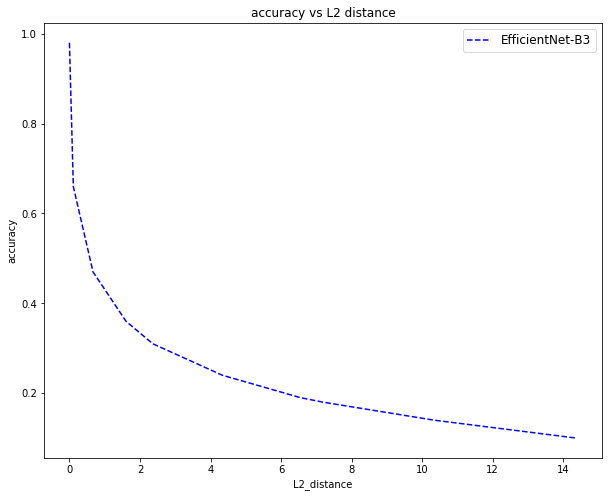

In [0]:
# Plotting accuracy versus L2 

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
#plt.plot(L2_dist,score_adv,'--')
#ax.plot(L2_dist_jump,score_adv_jump, "b--", label="FGSM Jump RELU")
ax.plot(L2_dist, score_adv, "b--", label="EfficientNet-B3")
ax.legend(loc='upper right',prop={'size': 12})
plt.xlabel('L2_distance')
plt.ylabel('accuracy')
plt.title('accuracy vs L2 distance')

plt.show()

## From now on, we will repeat exactly the same process as above but for different models. Therefore there is no need to comment any further.




In [0]:
# Importing pre-trained model VGG19 and we doing exaclty the same as above for Efficient Net

VGG19 = keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', input_shape=(32,32,3), pooling='avg')


VGG19.trainable = False

x = VGG19.output
#x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
predictions = Dense(units = 10, activation="softmax")(x)
model_VVG19 = Model(input = VGG19.input, output = predictions)

model_VVG19.compile(optimizer = Adam() ,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


In [0]:
model_VVG19.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=3, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/3
937/937 [==============================] - 63s 67ms/step - loss: 0.9628 - acc: 0.6429 - val_loss: 2.5984 - val_acc: 0.1673
Epoch 2/3
937/937 [==============================] - 57s 60ms/step - loss: 0.3774 - acc: 0.8874 - val_loss: 0.1636 - val_acc: 0.9645
Epoch 3/3
937/937 [==============================] - 57s 60ms/step - loss: 0.1480 - acc: 0.9649 - val_loss: 0.1063 - val_acc: 0.9819


In [0]:
from foolbox.criteria import TopKMisclassification
from foolbox.criteria import TargetClass

fmodel = foolbox.models.KerasModel(model_VVG19, bounds=(0,1))
attack=foolbox.attacks.gradient.GradientSignAttack(fmodel,criterion=Misclassification())

num_sample = 100

#adversarial_all = np.zeros(images.shape)
adv_input = []
#score_fgsm = []
#L2_fgsm = []

eps_max = np.linspace(0,0.3,10)
#adv_input = np.zeros((len(eps_max),10000,28,28,1))
for i in range (len(eps_max)):
    for j in range(num_sample):
        adversarial_all = attack(X_test3[j],labels[j],max_epsilon=eps_max[i],epsilons=1)
        if np.size(adversarial_all) == 1:
            adversarial_all = X_test3[j].reshape(1,32,32,3)
            adv_input.append(adversarial_all)
        else:
            adversarial_all = np.array(adversarial_all).reshape(1,32,32,3) # reshaping it for model prediction
 
            adv_input.append(adversarial_all)

/usr/local/lib/python3.6/dist-packages/foolbox/attacks/base.py:148: UserWarning: GradientSignAttack did not find an adversarial, maybe the model or the criterion is not supported by this attack.
  ' attack.'.format(self.name()))


In [0]:
vgg19_score_adv, vgg19_L2_dist = accuacy_vs_L2(adv_input,num_sample,eps_max,y_test,X_test3,model_VVG19)

with open("gdrive/My Drive/vgg19_accuracy.txt", "wb") as fp:   #Pickling
    pickle.dump(vgg19_score_adv , fp)

with open("gdrive/My Drive/vgg19_L2_distance.txt", "wb") as fp:   #Pickling
    pickle.dump(vgg19_L2_dist , fp)

(1000, 32, 32, 3)
100/100 [==============================] - 0s 395us/step


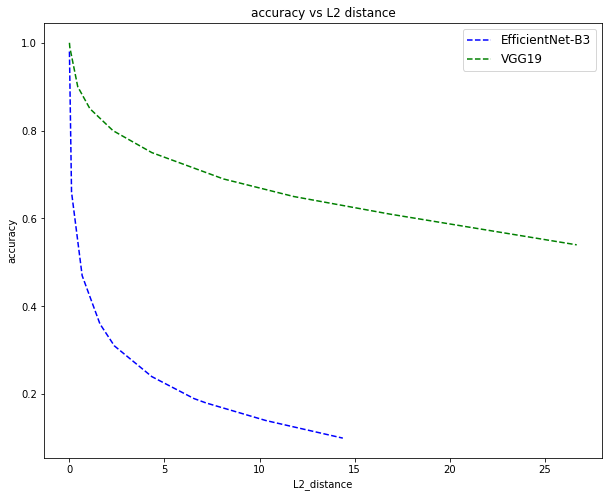

In [0]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
#plt.plot(L2_dist,score_adv,'--')
#ax.plot(L2_dist_jump,score_adv_jump, "b--", label="FGSM Jump RELU")
ax.plot(L2_dist, score_adv, "b--", label="EfficientNet-B3")
ax.plot(vgg19_L2_dist,vgg19_score_adv, "g--", label="VGG19")
ax.legend(loc='upper right',prop={'size': 12})
plt.xlabel('L2_distance')
plt.ylabel('accuracy')
plt.title('accuracy vs L2 distance')

plt.show()

In [0]:

dense =keras.applications.densenet.DenseNet121(include_top=False, weights='imagenet', input_shape=(32,32,3), pooling=None)


dense.trainable = False

x = dense.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
predictions = Dense(units = 10, activation="softmax")(x)
model_densenet = Model(input = dense.input, output = predictions)

model_densenet.compile(optimizer = Adam() ,loss='categorical_crossentropy',metrics=['accuracy'])

W0624 08:13:44.563496 140007363319680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



29089792/29084464 [==============================] - 1s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


In [0]:
model_densenet.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=3, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/3
937/937 [==============================] - 163s 174ms/step - loss: 0.1476 - acc: 0.9592 - val_loss: 0.0517 - val_acc: 0.9851
Epoch 2/3
937/937 [==============================] - 134s 143ms/step - loss: 0.0717 - acc: 0.9805 - val_loss: 0.0842 - val_acc: 0.9751
Epoch 3/3
937/937 [==============================] - 133s 142ms/step - loss: 0.1084 - acc: 0.9712 - val_loss: 0.0392 - val_acc: 0.9884


In [0]:
dense_score_adv, dense_L2_dist = accuacy_vs_L2(adv_input,num_sample,eps_max,y_test,X_test3,model_densenet)

with open("gdrive/My Drive/dense_accuracy.txt", "wb") as fp:   #Pickling
    pickle.dump(dense_score_adv , fp)

with open("gdrive/My Drive/dense_L2_distance.txt", "wb") as fp:   #Pickling
    pickle.dump(dense_L2_dist , fp)

(1000, 32, 32, 3)
100/100 [==============================] - 0s 684us/step


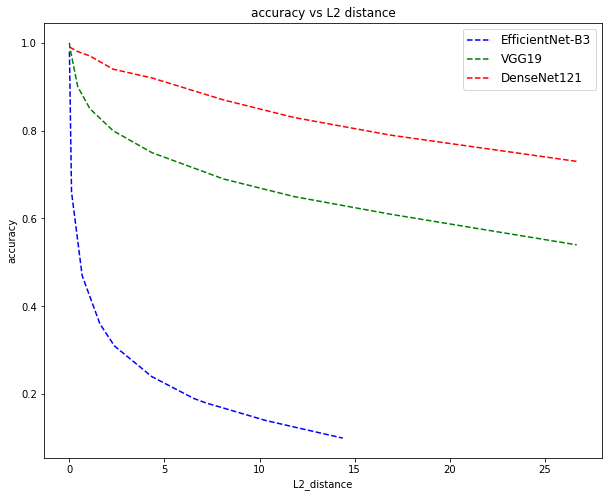

In [0]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
#plt.plot(L2_dist,score_adv,'--')
#ax.plot(L2_dist_jump,score_adv_jump, "b--", label="FGSM Jump RELU")
ax.plot(L2_dist, score_adv, "b--", label="EfficientNet-B3")
ax.plot(vgg19_L2_dist,vgg19_score_adv, "g--", label="VGG19")
ax.plot(dense_L2_dist,dense_score_adv, "r--", label="DenseNet121")
ax.legend(loc='upper right',prop={'size': 12})
plt.xlabel('L2_distance')
plt.ylabel('accuracy')
plt.title('accuracy vs L2 distance')

plt.show()

In [0]:
from foolbox.criteria import TopKMisclassification
from foolbox.criteria import TargetClass

fmodel = foolbox.models.KerasModel(model_densenet, bounds=(0,1))
attack=foolbox.attacks.gradient.GradientSignAttack(fmodel,criterion=Misclassification())

num_sample = 100


adv_input = []


eps_max = np.linspace(0,4,10)

for i in range (len(eps_max)):
    for j in range(num_sample):
        adversarial_all = attack(X_test3[j],labels[j],max_epsilon=eps_max[i],epsilons=1)
        if np.size(adversarial_all) == 1:
            adversarial_all = X_test3[j].reshape(1,32,32,3)
            adv_input.append(adversarial_all)
        else:
            adversarial_all = np.array(adversarial_all).reshape(1,32,32,3) # reshaping it for model prediction
 
            adv_input.append(adversarial_all)

/usr/local/lib/python3.6/dist-packages/foolbox/attacks/base.py:148: UserWarning: GradientSignAttack did not find an adversarial, maybe the model or the criterion is not supported by this attack.
  ' attack.'.format(self.name()))
/usr/local/lib/python3.6/dist-packages/foolbox/attacks/base.py:129: UserWarning: Not running the attack because the original input is already misclassified and the adversarial thus has a distance of 0.
  warnings.warn('Not running the attack because the original input'


In [0]:
keras.applications.mobilenet.MobileNet

mobile =keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet', input_shape=(32,32,3), pooling=None)


mobile.trainable = False

x = mobile.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
predictions = Dense(units = 10, activation="softmax")(x)
model_mobilenet = Model(input = mobile.input, output = predictions)

model_mobilenet.compile(optimizer = Adam() ,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]


In [0]:
model_mobilenet.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=3, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/3
937/937 [==============================] - 60s 64ms/step - loss: 0.2432 - acc: 0.9330 - val_loss: 0.1220 - val_acc: 0.9647
Epoch 2/3
937/937 [==============================] - 46s 49ms/step - loss: 0.1155 - acc: 0.9703 - val_loss: 0.2841 - val_acc: 0.9145
Epoch 3/3
937/937 [==============================] - 46s 49ms/step - loss: 0.0934 - acc: 0.9751 - val_loss: 0.0770 - val_acc: 0.9817


In [0]:
from foolbox.criteria import TopKMisclassification
from foolbox.criteria import TargetClass

fmodel = foolbox.models.KerasModel(model_mobilenet, bounds=(0,1))
attack=foolbox.attacks.gradient.GradientSignAttack(fmodel,criterion=Misclassification())

num_sample = 100

#adversarial_all = np.zeros(images.shape)
adv_input = []
#score_fgsm = []
#L2_fgsm = []

eps_max = np.linspace(0,0.8,10)
#adv_input = np.zeros((len(eps_max),10000,28,28,1))
for i in range (len(eps_max)):
    for j in range(num_sample):
        adversarial_all = attack(X_test3[j],labels[j],max_epsilon=eps_max[i],epsilons=1)
        if np.size(adversarial_all) == 1:
            adversarial_all = X_test3[j].reshape(1,32,32,3)
            adv_input.append(adversarial_all)
        else:
            adversarial_all = np.array(adversarial_all).reshape(1,32,32,3) # reshaping it for model prediction
 
            adv_input.append(adversarial_all)

/usr/local/lib/python3.6/dist-packages/foolbox/attacks/base.py:148: UserWarning: GradientSignAttack did not find an adversarial, maybe the model or the criterion is not supported by this attack.
  ' attack.'.format(self.name()))


In [0]:
mobile_score_adv, mobile_L2_dist = accuacy_vs_L2(adv_input,num_sample,eps_max,y_test,X_test3,model_mobilenet)

with open("gdrive/My Drive/mobile_accuracy.txt", "wb") as fp:   #Pickling
    pickle.dump(mobile_score_adv, fp)
with open("gdrive/My Drive/mobile_L2_distance.txt", "wb") as fp:   #Pickling
    pickle.dump(mobile_L2_dist, fp)

(1000, 32, 32, 3)
100/100 [==============================] - 0s 298us/step


In [0]:
mobile_L2_dist[:5]

[0.0,
 0.8376770925316908,
 1.2263613695128561,
 4.025131786272736,
 12.553505340799703,
 17.845581958821874,
 30.798292557817255,
 60.53845128629541,
 73.96686461498528,
 75.46612777869542]

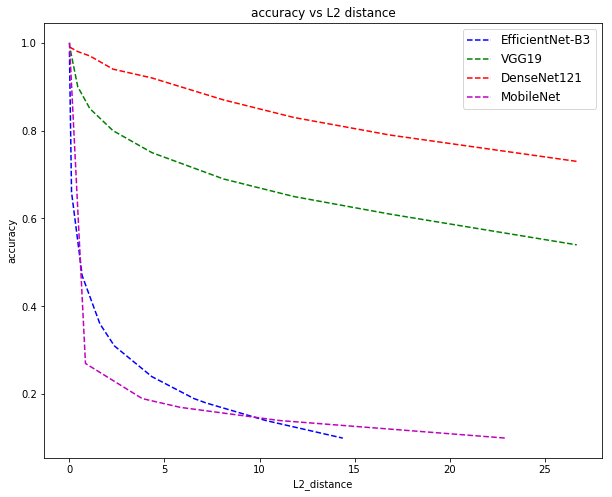

In [0]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
#plt.plot(L2_dist,score_adv,'--')
#ax.plot(L2_dist_jump,score_adv_jump, "b--", label="FGSM Jump RELU")
ax.plot(L2_dist, score_adv, "b--", label="EfficientNet-B3")
ax.plot(vgg19_L2_dist,vgg19_score_adv, "g--", label="VGG19")
ax.plot(dense_L2_dist,dense_score_adv, "r--", label="DenseNet121")
ax.plot(mobile_L2_dist[:6],mobile_score_adv[:6], "m--", label="MobileNet")
ax.legend(loc='upper right',prop={'size': 12})
plt.xlabel('L2_distance')
plt.ylabel('accuracy')
plt.title('accuracy vs L2 distance')

plt.show()

In [0]:



resnet2 =keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet', input_shape=(32,32,3), pooling=None)


resnet2.trainable = False

x = resnet2.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
predictions = Dense(units = 10, activation="softmax")(x)
model_resnetV2 = Model(input = resnet2.input, output = predictions)

model_resnetV2.compile(optimizer = Adam() ,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [0]:





resnet =keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(32,32,3), pooling=None)


resnet.trainable = False

x = resnet.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
predictions = Dense(units = 10, activation="softmax")(x)
model_resnet = Model(input = resnet.input, output = predictions)

model_resnet.compile(optimizer = Adam() ,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  app.launch_new_instance()


In [0]:
model_resnet.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=3, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/3
937/937 [==============================] - 117s 124ms/step - loss: 0.3813 - acc: 0.9127 - val_loss: 2.7200 - val_acc: 0.6094
Epoch 2/3
937/937 [==============================] - 93s 99ms/step - loss: 0.1648 - acc: 0.9550 - val_loss: 0.0642 - val_acc: 0.9784
Epoch 3/3
937/937 [==============================] - 93s 99ms/step - loss: 0.0819 - acc: 0.9762 - val_loss: 0.0448 - val_acc: 0.9870


In [0]:
from foolbox.criteria import TopKMisclassification
from foolbox.criteria import TargetClass

fmodel = foolbox.models.KerasModel(model_resnet, bounds=(0,1))
attack=foolbox.attacks.gradient.GradientSignAttack(fmodel,criterion=Misclassification())

num_sample = 100


adv_input = []


eps_max = np.linspace(0,0.5,10)
#adv_input = np.zeros((len(eps_max),10000,28,28,1))
for i in range (len(eps_max)):
    for j in range(num_sample):
        adversarial_all = attack(X_test3[j],labels[j],max_epsilon=eps_max[i],epsilons=1)
        if np.size(adversarial_all) == 1:
            adversarial_all = X_test3[j].reshape(1,32,32,3)
            adv_input.append(adversarial_all)
        else:
            adversarial_all = np.array(adversarial_all).reshape(1,32,32,3) # reshaping it for model prediction
 
            adv_input.append(adversarial_all)

/usr/local/lib/python3.6/dist-packages/foolbox/attacks/base.py:148: UserWarning: GradientSignAttack did not find an adversarial, maybe the model or the criterion is not supported by this attack.
  ' attack.'.format(self.name()))
/usr/local/lib/python3.6/dist-packages/foolbox/attacks/base.py:129: UserWarning: Not running the attack because the original input is already misclassified and the adversarial thus has a distance of 0.
  warnings.warn('Not running the attack because the original input'


In [0]:
resnet_score_adv, resnet_L2_dist = accuacy_vs_L2(adv_input,num_sample,eps_max,y_test,X_test3,model_resnet)

(1000, 32, 32, 3)
100/100 [==============================] - 0s 545us/step


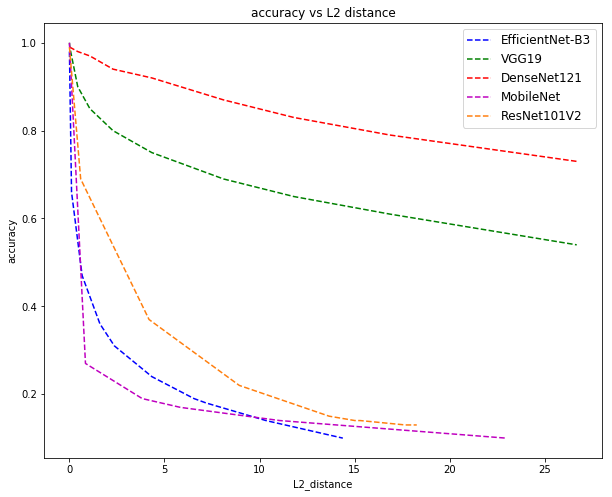

In [0]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
#plt.plot(L2_dist,score_adv,'--')
#ax.plot(L2_dist_jump,score_adv_jump, "b--", label="FGSM Jump RELU")
ax.plot(L2_dist, score_adv, "b--", label="EfficientNet-B3")
ax.plot(vgg19_L2_dist,vgg19_score_adv, "g--", label="VGG19")
ax.plot(dense_L2_dist,dense_score_adv, "r--", label="DenseNet121")
ax.plot(mobile_L2_dist[:6],mobile_score_adv[:6], "m--", label="MobileNet")
ax.plot(resnet_L2_dist,resnet_score_adv, "C1--", label="ResNet101V2")

ax.legend(loc='upper right',prop={'size': 12})
plt.xlabel('L2_distance')
plt.ylabel('accuracy')
plt.title('accuracy vs L2 distance')

plt.show()

## Below is our orignal model (the one we have been using throughtout this project)

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32,32,3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))



model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=3, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/3
937/937 [==============================] - 59s 63ms/step - loss: 0.1850 - acc: 0.9415 - val_loss: 0.0400 - val_acc: 0.9861
Epoch 2/3
937/937 [==============================] - 36s 38ms/step - loss: 0.0621 - acc: 0.9810 - val_loss: 0.0251 - val_acc: 0.9912
Epoch 3/3
937/937 [==============================] - 36s 38ms/step - loss: 0.0454 - acc: 0.9858 - val_loss: 0.0187 - val_acc: 0.9927


In [0]:
from foolbox.criteria import TopKMisclassification
from foolbox.criteria import TargetClass

fmodel = foolbox.models.KerasModel(model, bounds=(0,1))
attack=foolbox.attacks.gradient.GradientSignAttack(fmodel,criterion=Misclassification())

num_sample = 100


adv_input = []

eps_max = np.linspace(0,0.5,10)

for i in range (len(eps_max)):
    for j in range(num_sample):
        adversarial_all = attack(X_test3[j],labels[j],max_epsilon=eps_max[i],epsilons=1)
        if np.size(adversarial_all) == 1:
            adversarial_all = X_test3[j].reshape(1,32,32,3)
            adv_input.append(adversarial_all)
        else:
            adversarial_all = np.array(adversarial_all).reshape(1,32,32,3) # reshaping it for model prediction
 
            adv_input.append(adversarial_all)

/usr/local/lib/python3.6/dist-packages/foolbox/attacks/base.py:148: UserWarning: GradientSignAttack did not find an adversarial, maybe the model or the criterion is not supported by this attack.
  ' attack.'.format(self.name()))


In [0]:
model_score_adv, model_L2_dist = accuacy_vs_L2(adv_input,num_sample,eps_max,y_test,X_test3,model)

(1000, 32, 32, 3)
100/100 [==============================] - 0s 412us/step


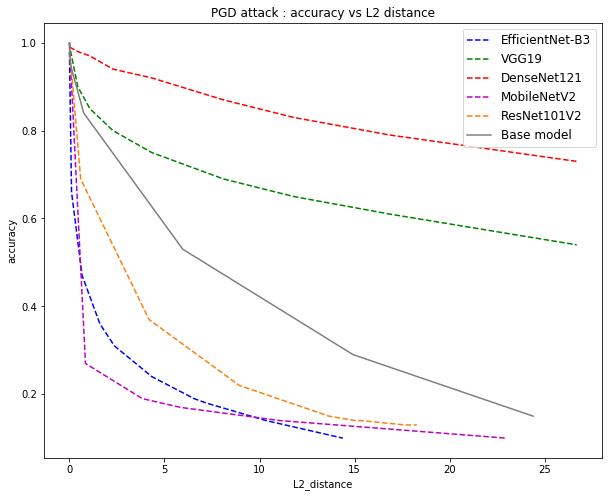

In [0]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
#plt.plot(L2_dist,score_adv,'--')
#ax.plot(L2_dist_jump,score_adv_jump, "b--", label="FGSM Jump RELU")
ax.plot(L2_dist, score_adv, "b--", label="EfficientNet-B3")
ax.plot(vgg19_L2_dist,vgg19_score_adv, "g--", label="VGG19")
ax.plot(dense_L2_dist[:10],dense_score_adv[:10], "r--", label="DenseNet121")
ax.plot(mobile_L2_dist[:6],mobile_score_adv[:6], "m--", label="MobileNetV2")
ax.plot(resnet_L2_dist,resnet_score_adv, "C1--", label="ResNet101V2")
ax.plot(model_L2_dist[:6],model_score_adv[:6], "C7", label="Base model")

ax.legend(loc='best',prop={'size': 12})
plt.xlabel('L2_distance')
plt.ylabel('accuracy')
plt.title('PGD attack : accuracy vs L2 distance')

plt.show()